In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import Ko

In [2]:
raw_per = pd.read_csv('../Data/ALL/Annual/ALL_SIZE_ANNUAL.csv', encoding = 'cp949', header = 7, dtype = 'str')
raw_rt = pd.read_csv('../Data/ALL/Annual/ALL_SILH_SUIK_RT_ANNUAL_NO_DIVIDEND.csv', encoding = 'cp949', header = 7, dtype = 'str')

## **전체기간 총 상장 주식 수는 5014개**

In [3]:
stock_name_ls = raw_rt.iloc[1,1:].tolist()

In [4]:
len(stock_name_ls)

5019

## **보통주만 선별하는 작업 필요**

In [5]:
stock_name_ls[:10]

['조흥은행',
 '조흥은행(1신)',
 '조흥은행(2신)',
 '동화약품',
 '동화약품공업(1신)',
 '동화약품(전환1신)',
 '동화약품(전환2신)',
 '우리은행',
 '한빛은행(1신)',
 '한국상업은행(2신)']

## **Raw 데이터에 문제가 있는 16개 기업 제거**

In [6]:
error_stock_ls = ['삼성물산','알루코','하나은행','두산건설','SK',
                  '고려시멘트','광주은행','경남은행','신성이엔지', '에스와이코퍼레이션',
                  '현대리바트','세원','풀무원','국민은행','핸디소프트','아이티센']

In [7]:
stock_name_ls = [x for x in stock_name_ls if not x in error_stock_ls]

In [8]:
def clean_uncommon_stocks(stock_name_ls):
    # (1신) 꼴 제거
    unwanted_word_ls = ['(', '1신', '2신', '3신','4신','우B','우C','1','2','3','우선','스팩']
    
    for unwanted_word in unwanted_word_ls:
        stock_name_ls = [x for x in stock_name_ls if not unwanted_word in x]
    
    stock_name_ls = [x for x in stock_name_ls if not x[-1] == '우']
    return stock_name_ls

## **최종적으로 선정된 주식의 수는 2900개**

In [9]:
common_stock_ls = clean_uncommon_stocks(stock_name_ls)
len(common_stock_ls)

2904

# 성과지표 데이터프레임 전처리 수행

In [10]:
per_df = Ko.Preprocessing(raw_per, column = '기업명', drop_limit=0)
per_df = per_df.loc[common_stock_ls]

In [11]:
len(per_df)

2904

# 수익률 DF 전처리

In [12]:
rt_df = Ko.Preprocessing(raw_rt, column = '기업명', drop_limit=0).apply(lambda x: Ko.rt_transform(x), axis = 1)

rt_df = rt_df.loc[per_df.index]
rt_df = rt_df.iloc[:, :-1]

In [13]:
rt_df.loc['조흥은행'].iloc[173:178]

Series([], Name: 조흥은행, dtype: float64)

In [14]:
len(rt_df)

2904

In [15]:
rt_df.max(axis = 1).sort_values(ascending = False)

한글과컴퓨터       125.2411
솔본           112.5581
테라            82.1900
한국정보통신        49.9694
큐캐피탈          47.4391
유비케어          41.7411
진원생명과학        38.6802
디패션           38.4327
엔에스엔          38.3647
터보테크          36.2738
에듀패스          36.1407
스타맥스          35.5129
카카오           34.5069
대신정보통신        33.0189
팬텀엔터그룹        32.7789
디지틀조선         32.7089
위너지스          31.6081
정산애강          31.4888
모아텍           30.1589
한솔로지스틱스       27.1987
세원물산          27.1607
대동신금          23.6895
SBI인베스트먼트     23.3776
한일사료          23.3393
후야인포넷         22.2932
휴맥스홀딩스        21.1832
에프앤리퍼블릭       20.6000
삼보컴퓨터         19.6118
삼보산업          18.3163
제이엠아이         16.5050
               ...   
배럴             0.0000
티웨이항공          0.0000
디아이티           0.0000
씨앤지하이테크        0.0000
엠코르셋           0.0000
에코마이스터         0.0000
SG             0.0000
명성티엔에스         0.0000
케어랩스           0.0000
세종메디칼          0.0000
제노레이           0.0000
SK케미칼          0.0000
에이피티씨          0.0000
롯데정보통신         0.0000
한일시멘트     

# 포트폴리오 구성 수행

In [16]:
data = Ko.portfolio_selection(per_df)

In [17]:
data.head(5)

,19901231,19911231,19921231,19931231,19941231,19951231,19961231,19971231,19981231,19991231,...,20081231,20091231,20101231,20111231,20121231,20131231,20141231,20151231,20161231,20171231
조흥은행,x,9,9,9,9,9,9,9,9,9,...,x,x,x,x,x,x,x,x,x,x
동화약품,x,5,5,5,5,6,5,7,6,7,...,8,8,8,7,6,7,6,6,7,7
우리은행,x,9,9,9,9,9,9,9,9,9,...,8,9,8,8,8,8,8,9,9,9
KR모터스,x,5,4,5,4,2,3,5,4,3,...,6,5,5,5,5,4,3,5,6,5
경방,x,6,7,6,6,6,5,7,6,6,...,8,8,8,8,7,7,7,8,8,8


# 포트폴리오 성과분석

In [18]:
result = Ko.performance_analysis(data, rt_df)
result.index = pd.to_datetime(data.columns, format = '%Y%m%d')

In [19]:
result.min()

GROUP_0    0.568899
GROUP_1    0.533158
GROUP_2    0.478832
GROUP_3    0.491124
GROUP_4    0.457600
GROUP_5    0.477031
GROUP_6    0.410078
GROUP_7    0.405909
GROUP_8    0.401372
GROUP_9    0.413102
dtype: float64

In [20]:
result.max()

GROUP_0    5.317715
GROUP_1    3.431297
GROUP_2    4.094590
GROUP_3    3.676991
GROUP_4    3.450747
GROUP_5    2.187499
GROUP_6    2.026635
GROUP_7    2.109355
GROUP_8    1.857835
GROUP_9    1.746077
dtype: float64

# 1990년대

Text(0.5,1,'Performance result by PER Group')

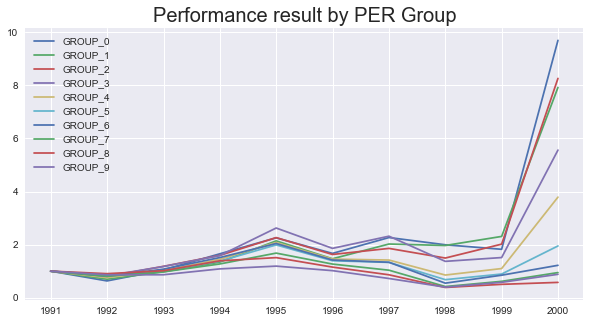

In [21]:
plt.figure(figsize = (10,5))

for column in result.columns:
    plt.plot(result[column].iloc[0:10].cumprod(), label = column)

plt.legend(loc = 'best')
plt.title('Performance result by PER Group', fontsize = 20)

# 2000년대

Text(0.5,1,'Performance result by PER Group')

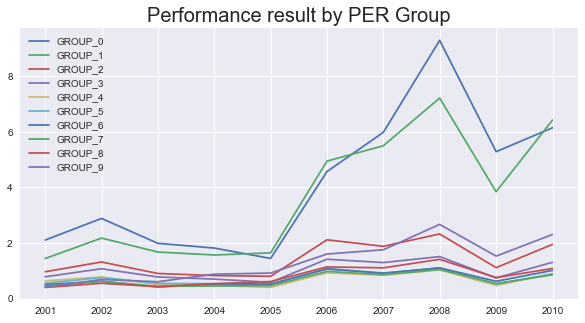

In [22]:
plt.figure(figsize = (10,5))

for column in result.columns:
    plt.plot(result[column].iloc[10:20].cumprod(), label = column)

plt.legend(loc = 'best')
plt.title('Performance result by PER Group', fontsize = 20)

# 2010년대

Text(0.5,1,'Performance result by PER Group')

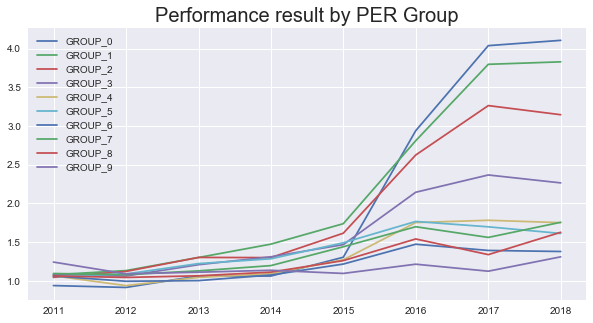

In [23]:
plt.figure(figsize = (10,5))

for column in result.columns:
    plt.plot(result[column].iloc[20:].cumprod(), label = column)

plt.legend(loc = 'best')
plt.title('Performance result by PER Group', fontsize = 20)

Text(0.5,1,'Performance result by PER Group')

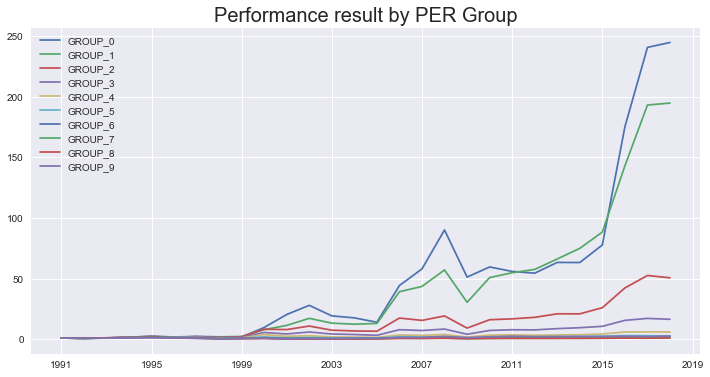

In [24]:
plt.figure(figsize = (12,6))

for column in result.columns:
    plt.plot(result[column].cumprod(), label = column)

plt.legend(loc = 'best')
plt.title('Performance result by PER Group', fontsize = 20)

In [25]:
summary_df = result.describe().apply(lambda x: round(x,3))
summary_df.loc['count'] = result.prod().apply(lambda x: np.power(x,1/len(result)))
summary_df.rename({'count' : 'geo_mean_return',
                    'mean' : 'arith_mean_return'},
                  inplace = True)
summary_df.apply(lambda x: round(x,3))

,GROUP_0,GROUP_1,GROUP_2,GROUP_3,GROUP_4,GROUP_5,GROUP_6,GROUP_7,GROUP_8,GROUP_9
geo_mean_return,1.217,1.207,1.150,1.105,1.066,1.037,1.019,1.013,1.001,1.036
arith_mean_return,1.394,1.308,1.264,1.210,1.168,1.105,1.080,1.075,1.052,1.090
std,0.946,0.614,0.689,0.623,0.592,0.407,0.358,0.362,0.311,0.336
min,0.569,0.533,0.479,0.491,0.458,0.477,0.410,0.406,0.401,0.413
25%,0.915,1.006,0.952,0.885,0.876,0.925,0.916,0.863,0.896,0.882
50%,1.163,1.162,1.107,1.094,1.031,1.040,1.035,1.053,1.075,1.034
75%,1.419,1.409,1.354,1.355,1.303,1.218,1.272,1.241,1.230,1.303
max,5.318,3.431,4.095,3.677,3.451,2.187,2.027,2.109,1.858,1.746
